In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\EngAh\Documents\industrial-data-analysis\data\sensor_data.csv", parse_dates=["timestamp"])
df.set_index("timestamp", inplace=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2024-01-01 08:00:00 to 2024-01-04 19:19:00
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   current_A       5000 non-null   float64
 1   voltage_V       5000 non-null   float64
 2   temperature_C   5000 non-null   float64
 3   vibration_mm_s  5000 non-null   float64
 4   load_pct        5000 non-null   float64
 5   fault_flag      5000 non-null   float64
dtypes: float64(6)
memory usage: 273.4 KB


,current_A,voltage_V,temperature_C,vibration_mm_s,load_pct,fault_flag
timestamp,,,,,,
2024-01-01 08:00:00,48.344595,397.286021,59.380922,2.174595,61.490142,0.0
2024-01-01 08:01:00,46.793344,398.778002,58.801102,2.136877,59.625215,0.0
2024-01-01 08:02:00,46.027178,397.610476,59.905675,1.989868,62.023081,0.0
2024-01-01 08:03:00,51.091108,400.441672,62.295936,2.257274,64.689111,0.0
2024-01-01 08:04:00,49.031710,404.788714,57.662200,1.868351,59.457565,0.0


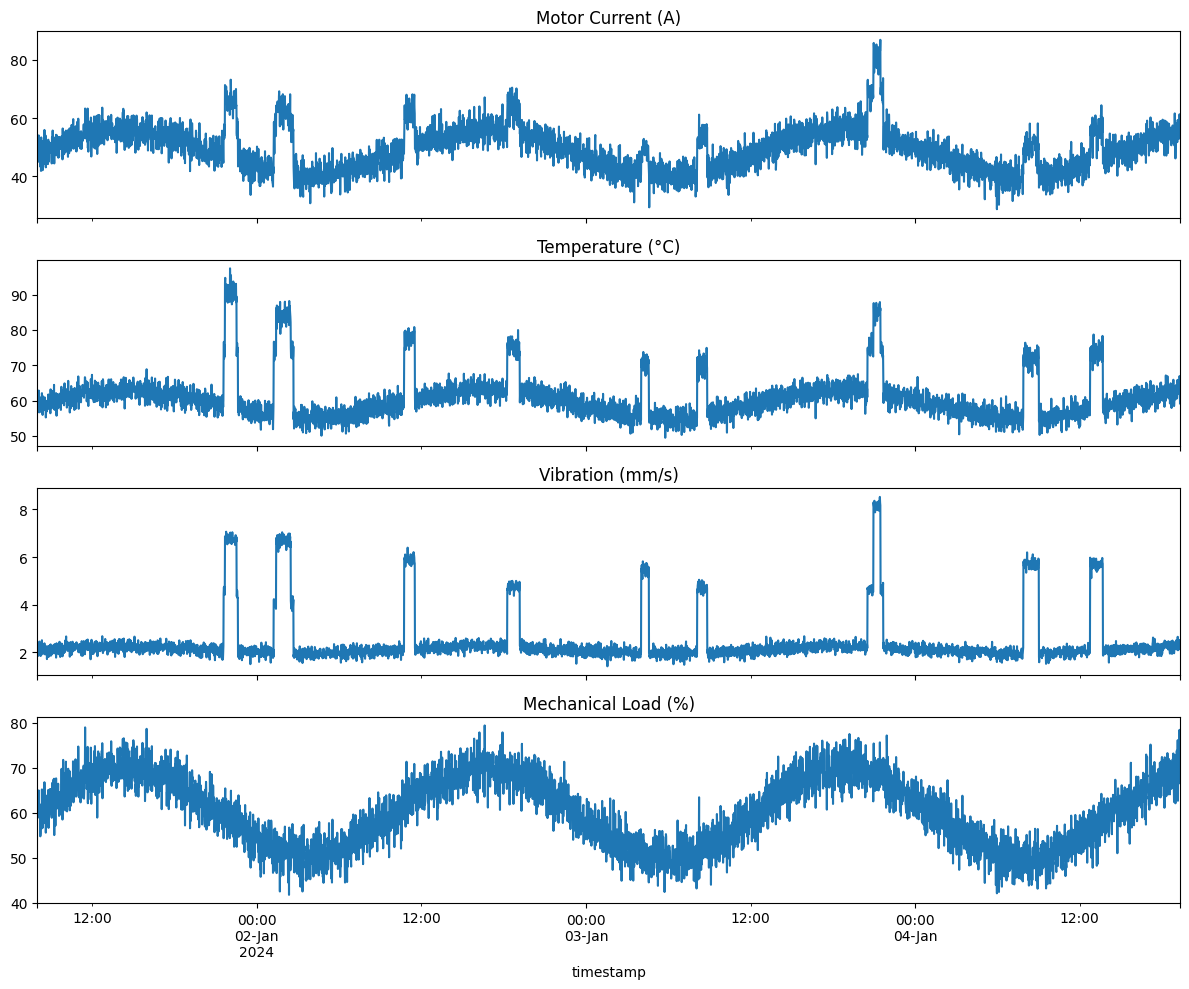

In [4]:
fig, ax = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

df["current_A"].plot(ax=ax[0], title="Motor Current (A)")
df["temperature_C"].plot(ax=ax[1], title="Temperature (°C)")
df["vibration_mm_s"].plot(ax=ax[2], title="Vibration (mm/s)")
df["load_pct"].plot(ax=ax[3], title="Mechanical Load (%)")

plt.tight_layout()
plt.show()


In [5]:
window = 30  # 30-minute rolling window

df["current_mean"] = df["current_A"].rolling(window).mean()
df["current_std"] = df["current_A"].rolling(window).std()

df["temperature_mean"] = df["temperature_C"].rolling(window).mean()
df["vibration_mean"] = df["vibration_mm_s"].rolling(window).mean()


In [6]:
df["current_z"] = (
    (df["current_A"] - df["current_mean"]) / df["current_std"]
)

df["anomaly"] = (df["current_z"].abs() > 3).astype(int)

df["anomaly"].value_counts()


anomaly
0    4979
1      21
Name: count, dtype: int64

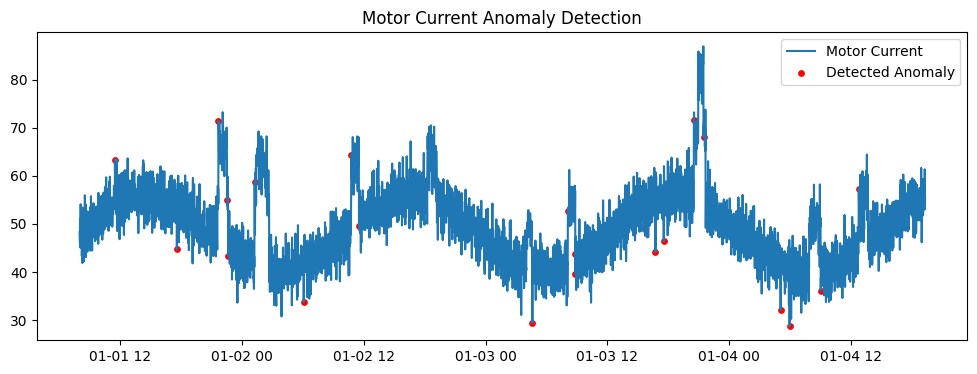

In [7]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df["current_A"], label="Motor Current")
plt.scatter(
    df[df["anomaly"] == 1].index,
    df[df["anomaly"] == 1]["current_A"],
    s=15,
    color="red",
    label="Detected Anomaly"
)
plt.legend()
plt.title("Motor Current Anomaly Detection")
plt.show()


## Engineering Interpretation

Detected anomalies coincide with sharp increases in motor current,
temperature, and vibration while supply voltage remains stable.

This pattern is consistent with abnormal mechanical loading or developing
bearing-related faults rather than electrical supply disturbances.

Such behavior would justify condition-based maintenance actions before
catastrophic failure occurs.
